install cdsapi

In [ ]:
!pip install cdsapi

# Configure CDSAPI and Download CAMS global reanalysis data

In [ ]:
import cdsapi

# Libraries for reading and working with multidimensional arrays
import numpy as np
import xarray as xr

# Library for plotting and visualising data
%matplotlib inline
import matplotlib.pyplot as plt

# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()


URL = 'https://ads-beta.atmosphere.copernicus.eu/api'
KEY = 'a209b9df-2c37-49c4-8a1b-e040aeb8c8d8'
DATADIR = '.'


dataset = "cams-global-ghg-reanalysis-egg4-monthly"
request = {
    'variable': ['co2_column_mean_molar_fraction'],
    'year': ['2003', '2004', '2005', '2006',
             '2007', '2008', '2009', '2010',
             '2011', '2012', '2013', '2014',
             '2015', '2016', '2017', '2018',
             '2019', '2020'],
    'month': ['01', '02', '03', '04', '05', '06',
              '07', '08', '09', '10', '11', '12'],
    'product_type': ['monthly_mean'],
    'data_format': 'netcdf'
}

client = cdsapi.Client(url=URL, key=KEY)
client.retrieve(dataset, request).download(
    f'{DATADIR}/CO2_2003-2020.nc')

2024-11-24 09:48:00,786 INFO [2024-09-26T00:00:00] **Welcome to the New Atmosphere Data Store (ADS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new ADS for the benefit of everyone. Thank you.
INFO:cads_api_client.legacy_api_client:[2024-09-26T00:00:00] **Welcome to the New Atmosphere Data Store (ADS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new ADS for the benefit of everyone. Thank you.
2024-11-24 09:48:00,790 INFO [2024-09-26T00:00:00] Watch our [Forum]( https://forum.ecmwf.int/) for Announcements, news and other discussed topics

8d985f80bbe6435218020efd45bddaf1.nc:   0%|          | 0.00/43.5M [00:00<?, ?B/s]

'./CO2_2003-2020.nc'

# Открытие и предварительная обработка данных + Построение временных рядов

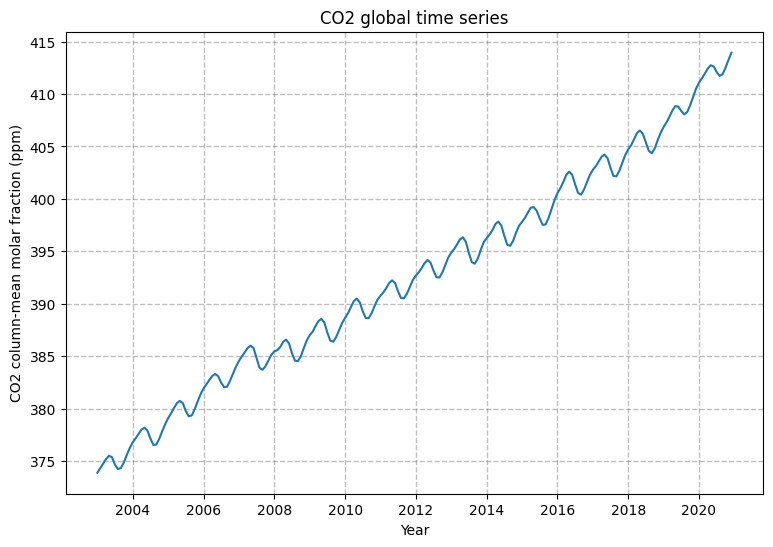

In [ ]:
# open file
fn = f'{DATADIR}/CO2_2003-2020.nc'
ds = xr.open_dataset(fn)


#### Spatial aggregation
weights = np.cos(np.deg2rad(ds.latitude))
weights.name = "weights"
ds_weighted = ds.weighted(weights)

# Average (mean) over the latitudinal axis
co_ds = ds_weighted.mean(dim=["latitude", "longitude"])


# Create xarray Data Array from Dataset object
co = co_ds['tcco2']


## Customised plot using matplotlib
fig, ax = plt.subplots(1, 1, figsize = (9, 6)) # Set size and dimensions of figure

ax.set_title('CO2 global time series', fontsize=12) # Set figure title
ax.set_ylabel('CO2 column-mean molar fraction (ppm)') # Set Y axis title
ax.set_xlabel('Year') # Set X axis title
ax.grid(linewidth=1, color='gray', alpha=0.5, linestyle='--') # Include gridlines
ax.plot(co.valid_time, co) # Plot the data

fig.savefig(f'{DATADIR}/CAMS_CO2_reanalysis.png') # Save the figure

# Анализ данных

In [ ]:
# Calculăm indicatorii statistici
mean_co2 = co.mean().item()
median_co2 = np.median(co)
std_co2 = co.std().item()

print(f"Valoarea medie CO₂: {mean_co2:.2f} ppm")
print(f"Valoarea mediană CO₂: {median_co2:.2f} ppm")
print(f"Deviația Standard CO₂: {std_co2:.2f} ppm")

Valoarea medie CO₂: 392.71 ppm
Valoarea mediană CO₂: 392.38 ppm
Deviația Standard CO₂: 10.56 ppm


# Визуализация данных на карте

In [ ]:
!pip install geopandas cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 23.2 MB/s eta 0:00:00


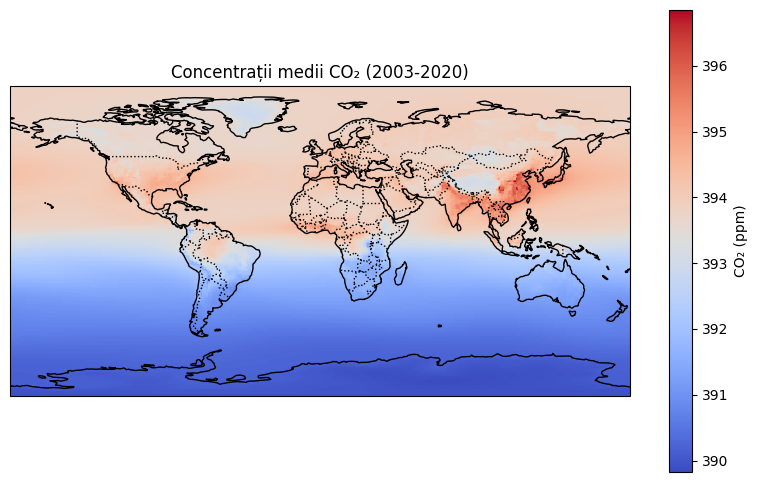

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Среднее значение CO₂ по времени
mean_map = ds['tcco2'].mean(dim="valid_time")

# Построение карты
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Используем географическую проекцию
ax.coastlines()  # Добавляем береговые линии
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Добавляем границы стран

# Отображение данных
mean_map.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'CO₂ (ppm)'})
ax.set_title("Concentrații medii CO₂ (2003-2020)")
plt.show()